# Yuninda Intan
## 21051214025
### Sistem Informasi 2021 A

#Scraping Data

In [ ]:
!pip install google-play-scraper

In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [ ]:
#scrape jumlah ulasan yang diinginkan
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'wp.wattpad',
    lang='id',  #disini kita mau men scrape data ulasan aplikasi shopee yang berada di google play store
    country='id', #kita setting bahasa nya menjadi bahasa indonesia
    sort=Sort.MOST_RELEVANT, # # kemudian kita gunakan most_relevan untuk mendapatkan ulasan yang paling relevant
    count=5000, # disini jumlah ulasan yang mau kita ambil ada seribu
    filter_score_with=None # # kemudian di filter_score kita gunakan None untuk mengambil semua score atau ratting bintang 1 sampai 5
)

In [ ]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])
df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))
df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,1bab9503-8814-4f55-9153-01cfacd7838f,Rika listiani Rahayu,https://play-lh.googleusercontent.com/a/ACg8oc...,Apknya bagus!!!! Tapi kadang cerita yang udah ...,4,253,10.36.0,2023-11-09 09:05:19,None,NaT,10.36.0
1,ce91ced1-3fd0-49da-8e44-8af78e2a4f26,Harry,https://play-lh.googleusercontent.com/a-/ALV-U...,"Wattpad skrng terlalu banyak masalah, gw sebag...",2,183,10.36.0,2023-11-12 09:58:29,None,NaT,10.36.0
2,d48196f7-8a70-4e07-92aa-6035ee979e30,elsa manora suhendra,https://play-lh.googleusercontent.com/a-/ALV-U...,Jujur kecewa sih sama versi yang terbaru. Awal...,1,212,10.37.1,2023-11-11 05:17:03,None,NaT,10.37.1
3,14be4351-0577-4048-a199-1256e5abb154,Siti Salsabil P. J Inaku,https://play-lh.googleusercontent.com/a-/ALV-U...,"Kalo di suruh milih, mending yg versi lama aja...",2,36,10.37.1,2023-11-12 14:59:58,None,NaT,10.37.1
4,0d19799a-eb35-42ba-9a5c-4d44f72b4f8c,Nabila Aminatus Sholehah,https://play-lh.googleusercontent.com/a/ACg8oc...,Hai Wattpad. Tolong perbaiki lagi APKnya. APKn...,1,249,10.38.1,2023-11-17 15:03:30,None,NaT,10.38.1


In [ ]:
#Run This Code to Sort the Data By Date

new_df = df_busu[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,userName,score,at,content
111,Griselda Adisa Giovani,2,2023-11-19 12:59:45,kok sekarang Wattpad gak bisa buat di baca cer...
506,Yuni Asya,1,2023-11-19 12:58:11,Kenapa abis di update malah jadi aneh gini ya?...
511,Hanif Feriirawan,2,2023-11-19 12:55:35,Mohon ini kenapa wattpad pengen nangis selalu ...
4546,xw yz,1,2023-11-19 12:46:52,"wttpd yg sekarang udaa parah bgtt, aku pakai w..."
4552,Tya Nengsih,5,2023-11-19 11:29:50,Emang ya Wattpad itu paling the best deh


In [ ]:
my_df=sorted_df[['content', 'score']]
#karena kita hanya membutuhkan kolom content dan score maka kita lakukan filter kolom lgi hingga menyisakan kolom content dan score.

In [ ]:
print(my_df)

                                                content  score
111   kok sekarang Wattpad gak bisa buat di baca cer...      2
506   Kenapa abis di update malah jadi aneh gini ya?...      1
511   Mohon ini kenapa wattpad pengen nangis selalu ...      2
4546  wttpd yg sekarang udaa parah bgtt, aku pakai w...      1
4552           Emang ya Wattpad itu paling the best deh      5
...                                                 ...    ...
2085  wattpad itu bagus,aku suka,bisa buat kita suka...      5
4244  wattpad itu bagus,aku suka,bisa buat kita suka...      5
1534  Bagusan versi sebelumnya. Versi yang baru sema...      3
3291  Di upgrade malah kurang suka, makin sering ikl...      2
2992  Setelah Di update wattpad mungkin mengalami be...      1

[5000 rows x 2 columns]


#Pemberian Label

In [ ]:
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score == 3 :
    return 'Netral'
  elif score > 3 :
    return 'Positif'
my_df['Label'] = my_df ['score'].apply(pelabelan)
my_df.head(50)

<ipython-input-34-674b4ca6ef3f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['Label'] = my_df ['score'].apply(pelabelan)


,content,score,Label
111,kok sekarang Wattpad gak bisa buat di baca cer...,2,Negatif
506,Kenapa abis di update malah jadi aneh gini ya?...,1,Negatif
511,Mohon ini kenapa wattpad pengen nangis selalu ...,2,Negatif
4546,"wttpd yg sekarang udaa parah bgtt, aku pakai w...",1,Negatif
4552,Emang ya Wattpad itu paling the best deh,5,Positif
4670,Aku gk suka sama Wattpad yg sekarang soalnya b...,1,Negatif
507,Wattpad kenapa ya sekarang kalo lagi baca onli...,4,Positif
901,Habis di update malah gak bisa dibuka gmana si,1,Negatif
301,"Kalau baca cerita memang lebih nyaman disini, ...",4,Positif
4146,Ceritanya udah bagus banget tapi... Aku masih ...,4,Positif


In [ ]:
my_df.to_excel("scrapping_data_wattpad.xlsx", index = False)  #kemudian save menjadi file csv

                                             content  score    Label
0  kok sekarang Wattpad gak bisa buat di baca cer...      2  Negatif
1  Kenapa abis di update malah jadi aneh gini ya?...      1  Negatif
2  Mohon ini kenapa wattpad pengen nangis selalu ...      2  Negatif
3  wttpd yg sekarang udaa parah bgtt, aku pakai w...      1  Negatif
4           Emang ya Wattpad itu paling the best deh      5  Positif


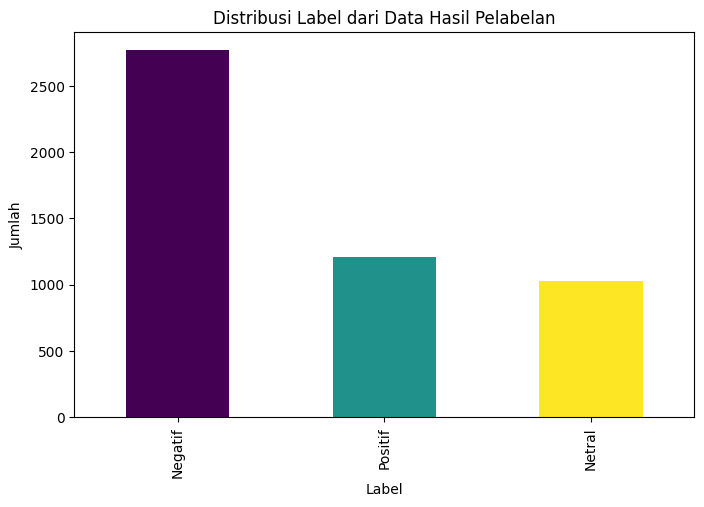

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file Excel
file_path = 'scrapping_data_wattpad.xlsx'
my_df = pd.read_excel(file_path)

# Menampilkan beberapa baris pertama data untuk memastikan pembacaan berhasil
print(my_df.head())

# Menentukan warna yang berbeda untuk setiap kategori atau label
colors = plt.cm.viridis(np.linspace(0, 1, len(my_df['Label'].unique())))

# Menggunakan matplotlib untuk membuat diagram batang
plt.figure(figsize=(8, 5))   # Menetapkan ukuran gambar

# Menghitung jumlah data untuk setiap label
label_counts = my_df['Label'].value_counts()

# Membuat diagram batang dengan warna yang berbeda
label_counts.plot(kind='bar', color=colors)

# Menambahkan label dan judul
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.title('Distribusi Label dari Data Hasil Pelabelan')

# Menampilkan diagram
plt.show()

#Preprocessing

In [ ]:
!pip install nltk
!pip install sastrawi
!pip install emoji

In [ ]:
import pandas as pd
import nltk
import re
import string
import emoji
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt');

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# Load data from Excel file
file_path = 'scrapping_data_wattpad.xlsx'
my_df = pd.read_excel(file_path)

In [ ]:
# Proses Cleaning

def remove_kata(comment):
  comment = comment.replace('\t', ' ').replace('\n', ' ').replace('\\u', ' ').replace('\\', '')
  comment = comment.encode('ascii', 'replace').decode('ascii')
  comment = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/S+)", " ", comment).split())
  return comment.replace("http://", " ").replace("https://", " ")

my_df['content'] = my_df['content'].apply(remove_kata)


def remove_angka(comment):
    return re.sub(r"\d+", " ", comment)

my_df['content'] = my_df['content'].apply(remove_angka)


def remove_punctuation(comment):
    return comment.translate(str.maketrans("", "", string.punctuation))

my_df['content'] = my_df['content'].apply(remove_punctuation)


def remove_whitespace_LT(comment):
    return comment.strip()

my_df['content'] = my_df['content'].apply(remove_whitespace_LT)


def remove_whitespace_multiple(comment):
    return re.sub('\s+', ' ', comment)

my_df['content'] = my_df['content'].apply(remove_whitespace_multiple)


def remove_single_char(comment):
    return re.sub(r"\b[a-zA-Z]\b", " ", comment)

my_df['content'] = my_df['content'].apply(remove_single_char)


print('Hasil Cleaning: \n')
print(my_df.head(50))

Hasil Cleaning: 

                                              content  score    Label
0   kok sekarang Wattpad gak bisa buat di baca cer...      2  Negatif
1   Kenapa abis di update malah jadi aneh gini ya ...      1  Negatif
2   Mohon ini kenapa wattpad pengen nangis selalu ...      2  Negatif
3   wttpd yg sekarang udaa parah bgtt aku pakai wt...      1  Negatif
4            Emang ya Wattpad itu paling the best deh      5  Positif
5   Aku gk suka sama Wattpad yg sekarang soalnya b...      1  Negatif
6   Wattpad kenapa ya sekarang kalo lagi baca onli...      4  Positif
7      Habis di update malah gak bisa dibuka gmana si      1  Negatif
8   Kalau baca cerita memang lebih nyaman disini t...      4  Positif
9   Ceritanya udah bagus banget tapi Aku masih kur...      4  Positif
10  Baru aja tadi siang aku uninstal ini apk sekar...      4  Positif
11  Baru aja tadi siang aku uninstal ini apk sekar...      4  Positif
12  Skrng wattpad udh lumayan bs baca cerpen offli...      3   Netral
13

In [ ]:
# Proses Case Folding

import re
import pandas as pd
def casefolding(comment):
    comment = comment.lower()
    comment = comment.strip()
    return comment
my_df['content'] = my_df['content'].apply(casefolding)
print('Hasil Case Folding: \n')
print(my_df.head(50))

Hasil Case Folding: 

                                              content  score    Label
0   kok sekarang wattpad gak bisa buat di baca cer...      2  Negatif
1   kenapa abis di update malah jadi aneh gini ya ...      1  Negatif
2   mohon ini kenapa wattpad pengen nangis selalu ...      2  Negatif
3   wttpd yg sekarang udaa parah bgtt aku pakai wt...      1  Negatif
4            emang ya wattpad itu paling the best deh      5  Positif
5   aku gk suka sama wattpad yg sekarang soalnya b...      1  Negatif
6   wattpad kenapa ya sekarang kalo lagi baca onli...      4  Positif
7      habis di update malah gak bisa dibuka gmana si      1  Negatif
8   kalau baca cerita memang lebih nyaman disini t...      4  Positif
9   ceritanya udah bagus banget tapi aku masih kur...      4  Positif
10  baru aja tadi siang aku uninstal ini apk sekar...      4  Positif
11  baru aja tadi siang aku uninstal ini apk sekar...      4  Positif
12  skrng wattpad udh lumayan bs baca cerpen offli...      3   Netra

In [ ]:
my_df.to_excel('cleaning.xlsx', index=False)

data_fold = pd.read_excel('cleaning.xlsx')
print(data_fold.shape)
print(data_fold.head())

(5000, 3)
                                             content  score    Label
0  kok sekarang wattpad gak bisa buat di baca cer...      2  Negatif
1  kenapa abis di update malah jadi aneh gini ya ...      1  Negatif
2  mohon ini kenapa wattpad pengen nangis selalu ...      2  Negatif
3  wttpd yg sekarang udaa parah bgtt aku pakai wt...      1  Negatif
4           emang ya wattpad itu paling the best deh      5  Positif


In [ ]:
import string
import re

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [ ]:
# Proses Tokenizing

import nltk
nltk.download('punkt')

def word_tokenize_wrapper(comment):
  return word_tokenize(comment)

my_df['content'] = my_df['content'].apply(word_tokenize_wrapper)

print('Hasil Tokenizing: \n')
print(my_df.head(20))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Hasil Tokenizing: 

                                              content  score    Label
0   [kok, sekarang, wattpad, gak, bisa, buat, di, ...      2  Negatif
1   [kenapa, abis, di, update, malah, jadi, aneh, ...      1  Negatif
2   [mohon, ini, kenapa, wattpad, pengen, nangis, ...      2  Negatif
3   [wttpd, yg, sekarang, udaa, parah, bgtt, aku, ...      1  Negatif
4   [emang, ya, wattpad, itu, paling, the, best, deh]      5  Positif
5   [aku, gk, suka, sama, wattpad, yg, sekarang, s...      1  Negatif
6   [wattpad, kenapa, ya, sekarang, kalo, lagi, ba...      4  Positif
7   [habis, di, update, malah, gak, bisa, dibuka, ...      1  Negatif
8   [kalau, baca, cerita, memang, lebih, nyaman, d...      4  Positif
9   [ceritanya, udah, bagus, banget, tapi, aku, ma...      4  Positif
10  [baru, aja, tadi, siang, aku, uninstal, ini, a...      4  Positif
11  [baru, aja, tadi, siang, aku, uninstal, ini, a...      4  Positif
12  [skrng, wattpad, udh, lumayan, bs, baca, cerpe...      3   Netral


In [ ]:
my_df.to_excel('tokenizing.xlsx', index=False)


data_token = pd.read_excel("tokenizing.xlsx")
print(data_token.shape)
print(data_token.head())

(5000, 3)
                                             content  score    Label
0  ['kok', 'sekarang', 'wattpad', 'gak', 'bisa', ...      2  Negatif
1  ['kenapa', 'abis', 'di', 'update', 'malah', 'j...      1  Negatif
2  ['mohon', 'ini', 'kenapa', 'wattpad', 'pengen'...      2  Negatif
3  ['wttpd', 'yg', 'sekarang', 'udaa', 'parah', '...      1  Negatif
4  ['emang', 'ya', 'wattpad', 'itu', 'paling', 't...      5  Positif


In [ ]:
# Proses Filtering/Stopword Removal

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'anj', 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'jgn', 'ga', 'ok', 'bgt', 'banget', 'jg',
                       'gw','guys','gtu','fyi',
                       'iya','aja','sih','iyaa','tpi','udh','ga','ngga','nggak'
                       ,'yeeha','itu','ituu','tpi','giniii','kaan','pas',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nyesel', 'habis','download','iyaah',
                       'nanya','yaa','tcodtaf','ccq','google','yo','gada','gue','udah','blm','cakep','beneran','dah',
                       'sender','baru','lagi','maen','tbtb','woy','lagi','lg','lgi','njir','kocak','wkwk','naseh','nan',
                       'tcok','cok','nntn','sengaja','bru',
                        ])

list_stopwords = set(list_stopwords)

def stopword_removal(comment):
    return [word for word in comment if word not in list_stopwords]

my_df['content'] = my_df['content'].apply(stopword_removal)
print('Hasil Filtering: \n')
print(my_df.head(30))

Hasil Filtering: 

                                              content  score    Label
0   [wattpad, baca, ceritanya, diperpustakaan, hil...      2  Negatif
1   [abis, update, aneh, gini, lanjutan, cerita, g...      1  Negatif
2   [mohon, wattpad, pengen, nangis, loading, buka...      2  Negatif
3   [wttpd, udaa, parah, bgtt, pakai, wttpd, thun,...      1  Negatif
4                    [emang, wattpad, the, best, deh]      5  Positif
5   [gk, suka, wattpad, ngelagnya, iklannyadan, lo...      1  Negatif
6   [wattpad, baca, online, buanyak, iklannya, abi...      4  Positif
7                             [update, dibuka, gmana]      1  Negatif
8   [baca, cerita, nyaman, iklannya, pindah, bab, ...      4  Positif
9                            [ceritanya, bagus, gitu]      4  Positif
10  [siang, uninstal, apk, malem, emang, segitu, c...      4  Positif
11  [siang, uninstal, apk, malem, emang, segitu, c...      4  Positif
12  [skrng, wattpad, lumayan, bs, baca, cerpen, of...      3   Netral
1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
my_df.to_excel('stopword.xlsx', index=False)

data_filter = pd.read_excel("stopword.xlsx")
print(data_filter.shape)
print(data_filter.head())

(5000, 3)
                                             content  score    Label
0  ['wattpad', 'baca', 'ceritanya', 'diperpustaka...      2  Negatif
1  ['abis', 'update', 'aneh', 'gini', 'lanjutan',...      1  Negatif
2  ['mohon', 'wattpad', 'pengen', 'nangis', 'load...      2  Negatif
3  ['wttpd', 'udaa', 'parah', 'bgtt', 'pakai', 'w...      1  Negatif
4         ['emang', 'wattpad', 'the', 'best', 'deh']      5  Positif


In [ ]:
# Proses Stemming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(document):
    return [stemmer.stem(term) for term in document]

my_df['content'] = my_df['content'].apply(stemming)
print(my_df['content'].head())

0    [wattpad, baca, cerita, pustaka, hilang, tolon...
1    [abis, update, aneh, gin, lanjut, cerita, gabi...
2    [mohon, wattpad, ken, nang, loading, bukak, bu...
3    [wttpd, udaa, parah, bgtt, pakai, wttpd, thun,...
4                     [emang, wattpad, the, best, deh]
Name: content, dtype: object


In [ ]:
my_df.to_excel('final.xlsx', index=False)

datafinal = pd.read_excel("final.xlsx")
print(datafinal.shape)
print(datafinal.head())

(5000, 3)
                                             content  score    Label
0  ['wattpad', 'baca', 'cerita', 'pustaka', 'hila...      2  Negatif
1  ['abis', 'update', 'aneh', 'gin', 'lanjut', 'c...      1  Negatif
2  ['mohon', 'wattpad', 'ken', 'nang', 'loading',...      2  Negatif
3  ['wttpd', 'udaa', 'parah', 'bgtt', 'pakai', 'w...      1  Negatif
4         ['emang', 'wattpad', 'the', 'best', 'deh']      5  Positif


#TF-IDF & Klasifikasi

In [ ]:
# Proses TF-IDF

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

datafinal = pd.read_excel("final.xlsx")
datafinal = datafinal.astype({'Label': 'category', 'content': 'string', 'score': 'int'})

tf = TfidfVectorizer()

text_tf = tf.fit_transform(datafinal['content'].astype('U'))

result = pd.DataFrame(text_tf.toarray(), columns=tf.get_feature_names_out()).join(datafinal['Label'])

print(result)

      aamiin  abad  abai  abaikkan  abal  abdi      abis  abiss  abistapiwp  \
0        0.0   0.0   0.0       0.0   0.0   0.0  0.000000    0.0         0.0   
1        0.0   0.0   0.0       0.0   0.0   0.0  0.444279    0.0         0.0   
2        0.0   0.0   0.0       0.0   0.0   0.0  0.000000    0.0         0.0   
3        0.0   0.0   0.0       0.0   0.0   0.0  0.000000    0.0         0.0   
4        0.0   0.0   0.0       0.0   0.0   0.0  0.000000    0.0         0.0   
...      ...   ...   ...       ...   ...   ...       ...    ...         ...   
4995     0.0   0.0   0.0       0.0   0.0   0.0  0.000000    0.0         0.0   
4996     0.0   0.0   0.0       0.0   0.0   0.0  0.000000    0.0         0.0   
4997     0.0   0.0   0.0       0.0   0.0   0.0  0.000000    0.0         0.0   
4998     0.0   0.0   0.0       0.0   0.0   0.0  0.000000    0.0         0.0   
4999     0.0   0.0   0.0       0.0   0.0   0.0  0.000000    0.0         0.0   

      abistu  ...  yuyurnya  yya  yyaa  zakiyah  za

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

# Membaca data dari file Excel
datafinal = pd.read_excel("final.xlsx")

# Memisahkan fitur dan label
X = datafinal['content']
y = datafinal['Label']

# Pembagian data 80:20 untuk pembelajaran dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengubah teks menjadi vektor fitur
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Algoritma Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred_nb = nb.predict(X_test_vec)

# Algoritma Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)
y_pred_rf = rf.predict(X_test_vec)

# Algoritma Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)
y_pred_lr = lr.predict(X_test_vec)

# Mengukur kinerja Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# Mengukur kinerja Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Mengukur kinerja Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Menampilkan hasil kinerja Naive Bayes
print("Naive Bayes:")
print("Akurasi (80:20):", accuracy_nb)
print("Presisi (80:20):", precision_nb)
print("Recall (80:20):", recall_nb)
print("F1 Score (80:20):", f1_nb)

# Menampilkan hasil kinerja Random Forest
print("\nRandom Forest:")
print("Akurasi (80:20):", accuracy_rf)
print("Presisi (80:20):", precision_rf)
print("Recall (80:20):", recall_rf)
print("F1 Score (80:20):", f1_rf)

# Menampilkan hasil kinerja Logistic Regression
print("\nLogistic Regression:")
print("Akurasi (80:20):", accuracy_lr)
print("Presisi (80:20):", precision_lr)
print("Recall (80:20):", recall_lr)
print("F1 Score (80:20):", f1_lr)

Naive Bayes:
Akurasi (80:20): 0.667
Presisi (80:20): 0.6766940298507462
Recall (80:20): 0.667
F1 Score (80:20): 0.618250840751731

Random Forest:
Akurasi (80:20): 0.689
Presisi (80:20): 0.720733464582127
Recall (80:20): 0.689
F1 Score (80:20): 0.6481233077804154

Logistic Regression:
Akurasi (80:20): 0.645
Presisi (80:20): 0.6288677428318807
Recall (80:20): 0.645
F1 Score (80:20): 0.6299506749007819


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
